# Learning Vector Quantization

 Learning vector quantization (LVQ), is a prototype-based supervised classification algorithm.
 
One of many other applications for LVQ is to overcome the limitation of kNN, where it is necessary to maintain a large database of training examples to make predictions. The LVQ algorithm deals with this by learning from a much smaller subset of patterns that best represent the training data.

This report aims to evaluate the implemented LVQ1, LVQ2.1 and LVQ3 algorithms. In evaluation, two databases of the Promise repository will be used: http://promise.site.uottawa.ca/SERepository/datasets-page.html

In [1]:
#Bibliotecas utilizadas
import misc
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#modulos implementados
from LVQ import lvq1
from LVQ import lvq2_1
from LVQ import lvq3

### Introduction

Given an initial set of prototypes, the LVQ adjusts the attributes of the
prototypes, in order to position each prototype at a point that is possible
to estabilish a discriminant function for the classes.

**The basic steps for adjusting the prototypes are:**

For each pattern of the training set:
- Get the prototype closest to the pattern.
- If they are of the same class, approach the prototype.
- If they are of different classes, move away the prototype.




Using dataset: long1.arff


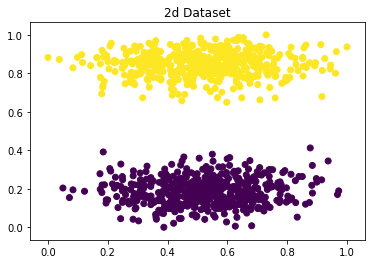

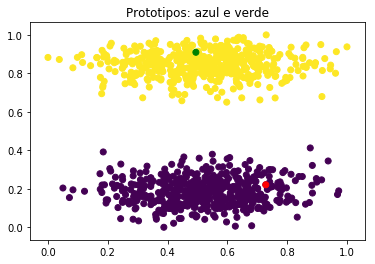

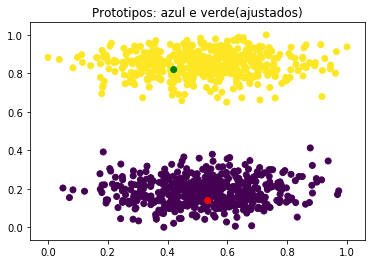

In [2]:
#---Using an artificial dataset with only two features to illustrate how the LVQ works.
dataset = misc.loadData('long1.arff')
dataset = np.asarray(dataset)

plt.scatter(dataset[:,0],dataset[:,1], c = dataset[:,2])
plt.title("2d Dataset", fontsize='large')
plt.show()

#---Choice of a random prototype of each class
prototypes = misc.getRandomPrototypes(dataset,1)

plt.scatter(dataset[:,0],dataset[:,1], c = dataset[:,2])
plt.title("Prototypes: blue and green", fontsize='large')
plt.scatter(prototypes[:,0],prototypes[:,1], c = ['g','r'])
plt.show()

#---Prototype fitting used for lvq1 with 0.4 learning rate
prototypes = lvq1(prototypes,dataset,0.4)

plt.title("Prototypes: blue and green(adjusted)", fontsize='large')
plt.scatter(dataset[:,0],dataset[:,1], c = dataset[:,2])
plt.scatter(prototypes[:,0],prototypes[:,1], c = ['g','r'])
plt.show()

## *LVQ1*

### Methodology

*LVQ1* is the base implementation of *LVQ*, it seeks to adjust the prototypes in order to obtain a positioning that is able to correctly discriminate the classes of the training set, the algorithm does this iterating over the set, and for each instance verifies the closest prototype using the *kNN* technique, if they are of the same class, a correction is made in the prototype seeking to approximate the same of the instance, otherwise the separation is done. This iteration is done a *n* number of times, depending on the training set. A learning rate **α** is used in the correction of prototypes in order to make fine adjustments, where it decreases with each iteration. 

\begin{align}
\alpha (i) = \alpha_{inicial} * \Bigl(1 - \frac{i}{i_{max}}\Bigr) 
\end{align}

### Results

In [4]:
print "------------------------------Verification LVQ1 with 5 prototypes per class-----------------------------"
from sklearn.neighbors import KNeighborsClassifier
#LVQ1 with dataset CM1 of the promise repository
dataset = misc.loadData('cm1.arff')
dataset = np.asarray(dataset)

media1 = 0
media2 = 0
for aux in range(10):
    #Partitioning the dataset randomly in 30% test 70% training
    trainset, testset = train_test_split(dataset, test_size=0.30)

    #Choice of 3 random prototypes of each class
    prototypes = misc.getRandomPrototypes(trainset,5)

    #Prototype fitting used for lvq1 with initial alpha = 0.4
    prototypes = lvq1(prototypes,trainset,0.4)

    #Instance / Class Separation
    prototypes_instances = prototypes[:,range(len(prototypes[0])-1)]
    prototypes_class = map(str,prototypes[:,-1])

    testset_instances = testset[:,range(len(testset[0])-1)]
    testset_class = testset[:,-1]

    #Accuracy check with 1-nn
    #treinamento
    knn = KNeighborsClassifier(n_neighbors=1)  
    knn.fit(prototypes_instances , prototypes_class)
    #score
    media1 += knn.score(testset_instances,testset_class) * 100
    #print "Acuracia LVQ 1-nn: "+repr(knn.score(testset_instances,testset_class) * 100) + '%'

    #Verification of acuracy with 3-nn

    #treinamento
    knn2 = KNeighborsClassifier(n_neighbors=3)  
    knn2.fit(prototypes_instances , prototypes_class)
    #score
    media2 += knn2.score(testset_instances,testset_class) * 100
    #print "Acuracia LVQ 3-nn: "+repr(knn2.score(testset_instances,testset_class) * 100) + '%'

print "Mean Accuracy LVQ 1-nn:" + repr(media1/10.0)
print "Mean Accuracy LVQ 3-nn:" + repr(media2/10.0)

#LVQ1 with dataset KC1 of the promise repository

dataset = misc.loadData('kc1.arff')
dataset = np.asarray(dataset)

media1 = 0
media2 = 0
for aux in range(10):
    #LVQ1 with dataset KC1 of the promise repository...
    trainset, testset = train_test_split(dataset, test_size=0.30)

    #Choice of 3 random prototypes of each class
    prototypes = misc.getRandomPrototypes(trainset,5)

    #Prototype fitting used for lvq1 with initial alpha = 0.4
    prototypes = lvq1(prototypes,trainset,0.3)

    #Instance / Class Separation
    prototypes_instances = prototypes[:,range(len(prototypes[0])-1)]
    prototypes_class = map(str,prototypes[:,-1])

    testset_instances = testset[:,range(len(testset[0])-1)]
    testset_class = testset[:,-1]

    #Accuracy check with 1-nn
    #treinamento
    knn = KNeighborsClassifier(n_neighbors=1)  
    knn.fit(prototypes_instances , prototypes_class)
    #score
    media1 += knn.score(testset_instances,testset_class) * 100
    #print "Acuracia LVQ 1-nn: "+repr(knn.score(testset_instances,testset_class) * 100) + '%'

    #Accuracy check with 3-nn

    #treinamento
    knn2 = KNeighborsClassifier(n_neighbors=3)  
    knn2.fit(prototypes_instances , prototypes_class)
    #score
    media2 += knn2.score(testset_instances,testset_class) * 100
    #print "Acuracia LVQ 3-nn: "+repr(knn2.score(testset_instances,testset_class) * 100) + '%'

print "Mean Accuracy LVQ 1-nn:" + repr(media1/10.0)
print "Mean Accuracy LVQ 3-nn:" + repr(media2/10.0)

------------------------------Verification LVQ1 with 5 prototypes per class-----------------------------
Using dataset: cm1.arff
Mean Accuracy LVQ 1-nn:90.13333333333333
Mean Accuracy LVQ 3-nn:78.53333333333333
Using dataset: kc1.arff
Mean Accuracy LVQ 1-nn:84.78672985781992
Mean Accuracy LVQ 3-nn:72.95418641390205


In [5]:
print "------------------------------Verification LVQ1 with 10 prototypes per class------------------------------"
from sklearn.neighbors import KNeighborsClassifier
#LVQ1 with dataset CM1 of the promise repository
dataset = misc.loadData('cm1.arff')
dataset = np.asarray(dataset)

media1 = 0
media2 = 0
for aux in range(10):
    #Partitioning the dataset randomly in 30% test 70% training
    trainset, testset = train_test_split(dataset, test_size=0.30)

    #Choice of 5 random prototypes of each class
    prototypes = misc.getRandomPrototypes(trainset,10)

    #Prototype fitting used for lvq1 with initial alpha = 0.4
    prototypes = lvq1(prototypes,trainset,0.4)

    #Instance / Class Separation
    prototypes_instances = prototypes[:,range(len(prototypes[0])-1)]
    prototypes_class = map(str,prototypes[:,-1])

    testset_instances = testset[:,range(len(testset[0])-1)]
    testset_class = testset[:,-1]

    #Accuracy check with 1-nn
    #training
    knn = KNeighborsClassifier(n_neighbors=1)  
    knn.fit(prototypes_instances , prototypes_class)
    #score
    media1 += knn.score(testset_instances,testset_class) * 100
    #print "Acuracia LVQ 1-nn: "+repr(knn.score(testset_instances,testset_class) * 100) + '%'

    #Accuracy check with 3-nn

    #treinamento
    knn2 = KNeighborsClassifier(n_neighbors=3)  
    knn2.fit(prototypes_instances , prototypes_class)
    #score
    media2 += knn2.score(testset_instances,testset_class) * 100
    #print "Acuracia LVQ 3-nn: "+repr(knn2.score(testset_instances,testset_class) * 100) + '%'

print "Mean Accuracy LVQ 1-nn:" + repr(media1/10.0)
print "Mean Accuracy LVQ 3-nn:" + repr(media2/10.0)

#LVQ1 with dataset KC1 of the promise repository
dataset = misc.loadData('KC1.arff')
dataset = np.asarray(dataset)

media1 = 0
media2 = 0
for aux in range(10):
    #Partitioning the dataset randomly in 30% test 70% training
    trainset, testset = train_test_split(dataset, test_size=0.30)

    #Choice of 5 random prototypes of each class
    prototypes = misc.getRandomPrototypes(trainset,10)

    #Prototype fitting used for lvq1 with initial alpha = 0.4
    prototypes = lvq1(prototypes,trainset,1)

    #Instance / Class Separation
    prototypes_instances = prototypes[:,range(len(prototypes[0])-1)]
    prototypes_class = map(str,prototypes[:,-1])

    testset_instances = testset[:,range(len(testset[0])-1)]
    testset_class = testset[:,-1]

    #Accuracy check with 1-nn
    #training
    knn = KNeighborsClassifier(n_neighbors=1)  
    knn.fit(prototypes_instances , prototypes_class)
    #score
    media1 += knn.score(testset_instances,testset_class) * 100
    #print "Acuracia LVQ 1-nn: "+repr(knn.score(testset_instances,testset_class) * 100) + '%'

    #Accuracy check with 3-nn

    #training
    knn2 = KNeighborsClassifier(n_neighbors=3)  
    knn2.fit(prototypes_instances , prototypes_class)
    #score
    media2 += knn2.score(testset_instances,testset_class) * 100
    #print "Acuracia LVQ 3-nn: "+repr(knn2.score(testset_instances,testset_class) * 100) + '%'

print "Mean Accuracy LVQ 1-nn:" + repr(media1/10.0)
print "Mean Accuracy LVQ 3-nn:" + repr(media2/10.0)

------------------------------Verification LVQ1 with 10 prototypes per class-----------------------------
Using dataset: cm1.arff
Mean Accuracy LVQ 1-nn:88.99999999999999
Mean Accuracy LVQ 3-nn:81.6
Using dataset: KC1.arff
Mean Accuracy LVQ 1-nn:84.18641390205372
Mean Accuracy LVQ 3-nn:69.33649289099526


## *LVQ2.1*

### Methodology

The *LVQ1.1* is an improvement of the LVQ1 previously presented, it seeks to adjust the prototypes in order to obtain a positioning that is able to correctly discriminate the classes of the training set, the algorithm does this iterating on the set and for each instance it verifies the two closest prototype using the kNN technique, if the neighboring prototypes are of different classes a correction is made in the two prototypes, a correction of distance and another of approximation relative to the instance of the training set. One note to note is that this correction will only be performed if the instance is within a window define as follows.
\begin{align}
min \frac{d_i}{d_j} \frac{d_j}{d_i} > S
\end{align}

\begin{align}
where
\end{align}

\begin{align}
S = \frac{1-W}{1+W}
\end{align}

Where the values *di* and *dj* are the distances of the prototypes relative to the instance *x*, and *w* is the size of the window that should be chosen according to the problem

## Results

In [6]:
print "-----------------------------Verification LVQ2.1 with 5 prototypes per class-----------------------------"
from sklearn.neighbors import KNeighborsClassifier
#LVQ2.1 with CM1 dataset from the promise repository
dataset = misc.loadData('cm1.arff')
dataset = np.asarray(dataset)

media1 = 0
media2 = 0
for aux in range(10):
    #Partitioning the dataset randomly in 30% test 70% training
    trainset, testset = train_test_split(dataset, test_size=0.30)

    #Choice of 3 random prototypes of each class
    prototypes = misc.getRandomPrototypes(trainset,5)

    #Adjustment of the prototypes used the lvq2.1 with initial alpha = 0.4 and w = 0.6
    prototypes = lvq2_1(prototypes,trainset,0.4,0.6)

    #Instance / Class Separation
    prototypes_instances = prototypes[:,range(len(prototypes[0])-1)]
    prototypes_class = map(str,prototypes[:,-1])

    testset_instances = testset[:,range(len(testset[0])-1)]
    testset_class = testset[:,-1]

    #Accuracy check with 1-nn
    #training
    knn = KNeighborsClassifier(n_neighbors=1)  
    knn.fit(prototypes_instances , prototypes_class)
    #score
    media1 += knn.score(testset_instances,testset_class) * 100
    #print "Acuracia LVQ2.1 1-nn: "+repr(knn.score(testset_instances,testset_class) * 100) + '%'

    #Accuracy check with 3-nn

    #treinamento
    knn2 = KNeighborsClassifier(n_neighbors=3)  
    knn2.fit(prototypes_instances , prototypes_class)
    #score
    media2 += knn2.score(testset_instances,testset_class) * 100
    #print "Acuracia LVQ2.1 3-nn: "+repr(knn2.score(testset_instances,testset_class) * 100) + '%'

print "Mean Accuracy LVQ2.1 1-nn:" + repr(media1/10.0)
print "Mean Accuracy LVQ2.1 3-nn:" + repr(media2/10.0)

#LVQ2.1 with dataset KC1 of the promise repository

dataset = misc.loadData('kc1.arff')
dataset = np.asarray(dataset)

media1 = 0
media2 = 0
for aux in range(10):
    #Partitioning the dataset randomly in 30% test 70% training
    trainset, testset = train_test_split(dataset, test_size=0.30)

    #Choice of 3 random prototypes of each class
    prototypes = misc.getRandomPrototypes(trainset,5)

    #Adjustment of the prototypes used the lvq2.1 with initial alpha = 0.4 and w = 0.6
    prototypes = lvq2_1(prototypes,trainset,0.4,0.6)

    #Instance / Class Separation
    prototypes_instances = prototypes[:,range(len(prototypes[0])-1)]
    prototypes_class = map(str,prototypes[:,-1])

    testset_instances = testset[:,range(len(testset[0])-1)]
    testset_class = testset[:,-1]

    #Accuracy check with 1-nn
    #training
    knn = KNeighborsClassifier(n_neighbors=1)  
    knn.fit(prototypes_instances , prototypes_class)
    #score
    media1 += knn.score(testset_instances,testset_class) * 100
    #print "Acuracia LVQ2.1 1-nn: "+repr(knn.score(testset_instances,testset_class) * 100) + '%'

    #Accuracy check with 3-nn

    #training
    knn2 = KNeighborsClassifier(n_neighbors=3)  
    knn2.fit(prototypes_instances , prototypes_class)
    #score
    media2 += knn2.score(testset_instances,testset_class) * 100
    #print "Acuracia LVQ2.1 3-nn: "+repr(knn2.score(testset_instances,testset_class) * 100) + '%'

print "Mean Accuracy LVQ2.1 1-nn:" + repr(media1/10.0)
print "Mean Accuracy LVQ2.1 3-nn:" + repr(media2/10.0)

------------------------------Verification LVQ2.1 with 5 prototypes per class-----------------------------
Using dataset: cm1.arff
Mean Accuracy LVQ2.1 1-nn:89.53333333333333
Mean Accuracy LVQ2.1 3-nn:89.66666666666666
Using dataset: kc1.arff
Mean Accuracy LVQ2.1 1-nn:84.67614533965245
Mean Accuracy LVQ2.1 3-nn:84.75513428120061


In [7]:
print "------------------------------Verification LVQ2.1 with 10 prototypes per class------------------------------"
from sklearn.neighbors import KNeighborsClassifier
#LVQ2.1 with CM1 dataset from the promise repository
dataset = misc.loadData('cm1.arff')
dataset = np.asarray(dataset)

media1 = 0
media2 = 0
for aux in range(10):
    #Partitioning the dataset randomly in 30% test 70% training
    trainset, testset = train_test_split(dataset, test_size=0.30)

    #Choice of 5 random prototypes of each class
    prototypes = misc.getRandomPrototypes(trainset,10)

    #Adjustment of the prototypes used the lvq2.1 with initial alpha = 0.4 and w = 0.6
    prototypes = lvq2_1(prototypes,trainset,0.4,0.6)

    #Instance / Class Separation
    prototypes_instances = prototypes[:,range(len(prototypes[0])-1)]
    prototypes_class = map(str,prototypes[:,-1])

    testset_instances = testset[:,range(len(testset[0])-1)]
    testset_class = testset[:,-1]

    #Accuracy check with 1-nn
    #training
    knn = KNeighborsClassifier(n_neighbors=1)  
    knn.fit(prototypes_instances , prototypes_class)
    #score
    media1 += knn.score(testset_instances,testset_class) * 100
    #print "Acuracia LVQ2.1 1-nn: "+repr(knn.score(testset_instances,testset_class) * 100) + '%'

    #Verification of acuracy with 3-nn

    #training
    knn2 = KNeighborsClassifier(n_neighbors=3)  
    knn2.fit(prototypes_instances , prototypes_class)
    #score
    media2 += knn2.score(testset_instances,testset_class) * 100
    #print "Acuracia LVQ2.1 3-nn: "+repr(knn2.score(testset_instances,testset_class) * 100) + '%'

print "Mean Accuracy LVQ2.1 1-nn:" + repr(media1/10.0)
print "Mean Accuracy LVQ2.1 3-nn:" + repr(media2/10.0)

#LVQ2.1 with dataset KC1 of the promise repository

dataset = misc.loadData('kc1.arff')
dataset = np.asarray(dataset)

media1 = 0
media2 = 0
for aux in range(10):
    #Partitioning the dataset randomly in 30% test 70% training
    trainset, testset = train_test_split(dataset, test_size=0.30)

    #Choice of 5 random prototypes of each class
    prototypes = misc.getRandomPrototypes(trainset,10)

    #Prototype fitting used the lvq1 with initial alpha = 0.4 and w = 0.6
    prototypes = lvq2_1(prototypes,trainset,0.4,0.6)

    #Instance / Class Separation
    prototypes_instances = prototypes[:,range(len(prototypes[0])-1)]
    prototypes_class = map(str,prototypes[:,-1])

    testset_instances = testset[:,range(len(testset[0])-1)]
    testset_class = testset[:,-1]

    #Accuracy check with 1-nn
    #training
    knn = KNeighborsClassifier(n_neighbors=1)  
    knn.fit(prototypes_instances , prototypes_class)
    #score
    media1 += knn.score(testset_instances,testset_class) * 100
    #print "Acuracia LVQ2.1 1-nn: "+repr(knn.score(testset_instances,testset_class) * 100) + '%'

    #Accuracy check with 3-nn

    #training
    knn2 = KNeighborsClassifier(n_neighbors=3)  
    knn2.fit(prototypes_instances , prototypes_class)
    #score
    media2 += knn2.score(testset_instances,testset_class) * 100
    #print "Acuracia LVQ2.1 3-nn: "+repr(knn2.score(testset_instances,testset_class) * 100) + '%'

print "Mean Accuracy LVQ2.1 1-nn:" + repr(media1/10.0)
print "Mean Accuracy LVQ2.1 3-nn:" + repr(media2/10.0)

------------------------------Verification LVQ2.1 with 10 prototypes per class-----------------------------
Using dataset: cm1.arff
Mean Accuracy LVQ2.1 1-nn:89.33333333333333
Mean Accuracy LVQ2.1 3-nn:89.39999999999999
Using dataset: kc1.arff
Mean Accuracy LVQ2.1 1-nn:84.67614533965244
Mean Accuracy LVQ2.1 3-nn:84.67614533965245


## *LVQ3*

# Methodology

LVQ 3 tries to avoid overfitting of LVQ 2.1. This acts even when the element is already correctly classified by the closest prototypes.

• Adjusts the prototypes even when the two closest ones are from same class as the training pattern (approaching them from the pattern).

• Introduces a estabilish factor **ε**.


## Results

In [8]:
print "------------------------------LVQ3 verification with 5 prototypes per class------------------------------"
from sklearn.neighbors import KNeighborsClassifier
#LVQ3 verification with 5 prototypes per class...
dataset = misc.loadData('cm1.arff')
dataset = np.asarray(dataset)

media1 = 0
media2 = 0
for aux in range(10):
    #Partitioning the dataset randomly in 30% test 70% training
    trainset, testset = train_test_split(dataset, test_size=0.30)

    #Choice of 3 random prototypes of each class
    prototypes = misc.getRandomPrototypes(trainset,5)

    #Prototype fitting used the lvq3 with initial alpha = 0.4, w = 0.6 and e = 0.5
    prototypes = lvq3(prototypes,trainset,0.4,0.6,0.5)

    #Instance / Class Separation
    prototypes_instances = prototypes[:,range(len(prototypes[0])-1)]
    prototypes_class = map(str,prototypes[:,-1])

    testset_instances = testset[:,range(len(testset[0])-1)]
    testset_class = testset[:,-1]

    #Accuracy check with 1-nn
    #training
    knn = KNeighborsClassifier(n_neighbors=1)  
    knn.fit(prototypes_instances , prototypes_class)
    #score
    media1 += knn.score(testset_instances,testset_class) * 100
    #print "Acuracia LVQ3 1-nn: "+repr(knn.score(testset_instances,testset_class) * 100) + '%'

    #Accuracy check with 3-nn

    #training
    knn2 = KNeighborsClassifier(n_neighbors=3)  
    knn2.fit(prototypes_instances , prototypes_class)
    #score
    media2 += knn2.score(testset_instances,testset_class) * 100
    #print "Acuracia LVQ2.1 3-nn: "+repr(knn2.score(testset_instances,testset_class) * 100) + '%'

print "Mean Accuracy LVQ3 1-nn:" + repr(media1/10.0)
print "Mean Accuracy LVQ3 3-nn:" + repr(media2/10.0)

#LVQ2.1 with dataset KC1 of the promise repository

dataset = misc.loadData('kc1.arff')
dataset = np.asarray(dataset)

media1 = 0
media2 = 0
for aux in range(10):
    #Partitioning the dataset randomly in 30% test 70% training
    trainset, testset = train_test_split(dataset, test_size=0.30)

    #Choice of 3 random prototypes of each class
    prototypes = misc.getRandomPrototypes(trainset,5)

    #Prototype fitting used the lvq3 with initial alpha = 0.4, w = 0.6 and e = 0.5
    prototypes = lvq3(prototypes,trainset,0.4,0.6,0.5)

    #Instance / Class Separation
    prototypes_instances = prototypes[:,range(len(prototypes[0])-1)]
    prototypes_class = map(str,prototypes[:,-1])

    testset_instances = testset[:,range(len(testset[0])-1)]
    testset_class = testset[:,-1]

    #Accuracy check with 1-nn
    #training
    knn = KNeighborsClassifier(n_neighbors=1)  
    knn.fit(prototypes_instances , prototypes_class)
    #score
    media1 += knn.score(testset_instances,testset_class) * 100
    #print "Acuracia LVQ3 1-nn: "+repr(knn.score(testset_instances,testset_class) * 100) + '%'

    #Verification of acuracy with 3-nn

    #training
    knn2 = KNeighborsClassifier(n_neighbors=3)  
    knn2.fit(prototypes_instances , prototypes_class)
    #score
    media2 += knn2.score(testset_instances,testset_class) * 100
    #print "Acuracia LVQ3 3-nn: "+repr(knn2.score(testset_instances,testset_class) * 100) + '%'

print "Mean Accuracy LVQ3 1-nn:" + repr(media1/10.0)
print "Mean Accuracy LVQ3 3-nn:" + repr(media2/10.0)

------------------------------LVQ3 verification with 5 prototypes per class-----------------------------
Using dataset: cm1.arff
Mean Accuracy LVQ3 1-nn:89.26666666666667
Mean Accuracy LVQ3 3-nn:89.4
Using dataset: kc1.arff
Mean Accuracy LVQ3 1-nn:84.47077409162719
Mean Accuracy LVQ3 3-nn:84.565560821485


In [9]:
print "------------------------------Verification LVQ3 with 10 prototypes per class------------------------------"
from sklearn.neighbors import KNeighborsClassifier
#LVQ3 with dataset CM1 of the promise repository
dataset = misc.loadData('cm1.arff')
dataset = np.asarray(dataset)

media1 = 0
media2 = 0
for aux in range(10):
    #Partitioning the dataset randomly in 30% test 70% training
    trainset, testset = train_test_split(dataset, test_size=0.30)

    #Choice of 3 random prototypes of each class
    prototypes = misc.getRandomPrototypes(trainset,10)

    #Prototype fitting used the lvq3 with initial alpha = 0.4, w = 0.6 and e = 0.5
    prototypes = lvq3(prototypes,trainset,0.4,0.6,0.5)

    #Instance / Class Separation
    prototypes_instances = prototypes[:,range(len(prototypes[0])-1)]
    prototypes_class = map(str,prototypes[:,-1])

    testset_instances = testset[:,range(len(testset[0])-1)]
    testset_class = testset[:,-1]

    #Accuracy check with 1-nn
    #training
    knn = KNeighborsClassifier(n_neighbors=1)  
    knn.fit(prototypes_instances , prototypes_class)
    #score
    media1 += knn.score(testset_instances,testset_class) * 100
    #print "Acuracia LVQ3 1-nn: "+repr(knn.score(testset_instances,testset_class) * 100) + '%'

    #Verification of acuracy with 3-nn

    #training
    knn2 = KNeighborsClassifier(n_neighbors=3)  
    knn2.fit(prototypes_instances , prototypes_class)
    #score
    media2 += knn2.score(testset_instances,testset_class) * 100
    #print "Acuracia LVQ2.1 3-nn: "+repr(knn2.score(testset_instances,testset_class) * 100) + '%'

print "Mean Accuracy LVQ3 1-nn:" + repr(media1/10.0)
print "Mean Accuracy LVQ3 3-nn:" + repr(media2/10.0)

#LVQ2.1 with dataset KC1 of the promise repository

dataset = misc.loadData('kc1.arff')
dataset = np.asarray(dataset)

media1 = 0
media2 = 0
for aux in range(10):
    #Partitioning the dataset randomly in 30% test 70% training
    trainset, testset = train_test_split(dataset, test_size=0.30)

    #Choice of 3 random prototypes of each class
    prototypes = misc.getRandomPrototypes(trainset,10)

    #Prototype fitting used the lvq3 with initial alpha = 0.4, w = 0.6 and e = 0.5
    prototypes = lvq3(prototypes,trainset,0.4,0.6,0.5)

    #Instance / Class Separation
    prototypes_instances = prototypes[:,range(len(prototypes[0])-1)]
    prototypes_class = map(str,prototypes[:,-1])

    testset_instances = testset[:,range(len(testset[0])-1)]
    testset_class = testset[:,-1]

    #Accuracy check with 1-nn
    #training
    knn = KNeighborsClassifier(n_neighbors=1)  
    knn.fit(prototypes_instances , prototypes_class)
    #score
    media1 += knn.score(testset_instances,testset_class) * 100
    #print "Acuracia LVQ3 1-nn: "+repr(knn.score(testset_instances,testset_class) * 100) + '%'

    #Accuracy check with 3-nn

    #training
    knn2 = KNeighborsClassifier(n_neighbors=3)  
    knn2.fit(prototypes_instances , prototypes_class)
    #score
    media2 += knn2.score(testset_instances,testset_class) * 100
    #print "Acuracia LVQ3 3-nn: "+repr(knn2.score(testset_instances,testset_class) * 100) + '%'

print "Mean Accuracy LVQ3 1-nn:" + repr(media1/10.0)
print "Mean Accuracy LVQ3 3-nn:" + repr(media2/10.0)

------------------------------Verification LVQ3 with 10 prototypes per class-----------------------------
Using dataset: cm1.arff
Mean Accuracy LVQ3 1-nn:89.93333333333332
Mean Accuracy LVQ3 3-nn:90.73333333333332
Using dataset: kc1.arff
Mean Accuracy LVQ3 1-nn:84.97630331753552
Mean Accuracy LVQ3 3-nn:85.07109004739337


## kNN

## Results

In [17]:
print "-----------------------------------------------KNN verification-----------------------------------------------"
from sklearn.neighbors import KNeighborsClassifier
#kNN with CM1 dataset from the promise repository
dataset = misc.loadData('cm1.arff')
dataset = np.asarray(dataset)

media1 = 0
media2 = 0
for aux in range(10):
    #Partitioning the dataset randomly in 30% test 70% training
    trainset, testset = train_test_split(dataset, test_size=0.30)

    #Instance / Class Separation
    trainset_instances = trainset[:,range(len(trainset[0])-1)]
    trainset_class = trainset[:,-1]
    
    testset_instances = testset[:,range(len(testset[0])-1)]
    testset_class = testset[:,-1]

    #Accuracy check with 1-nn
    #training
    knn = KNeighborsClassifier(n_neighbors=1)  
    knn.fit(trainset_instances , trainset_class)
    #score
    media1 += knn.score(testset_instances,testset_class) * 100
    #print "Acuracia LVQ3 1-nn: "+repr(knn.score(testset_instances,testset_class) * 100) + '%'

    #Verification of acuracy with 3-nn

    #training
    knn2 = KNeighborsClassifier(n_neighbors=3)  
    knn2.fit(trainset_instances , trainset_class)
    #score
    media2 += knn2.score(testset_instances,testset_class) * 100
    #print "Acuracia LVQ2.1 3-nn: "+repr(knn2.score(testset_instances,testset_class) * 100) + '%'

print "Mean Accuracy 1-nn:" + repr(media1/10.0)
print "Mean Accuracy 3-nn:" + repr(media2/10.0)

#kNN with dataset KC1 of the promise repository

dataset = misc.loadData('kc1.arff')
dataset = np.asarray(dataset)

media1 = 0
media2 = 0
for aux in range(10):
    #Partitioning the dataset randomly in 30% test 70% training
    trainset, testset = train_test_split(dataset, test_size=0.30)

    #Instance / Class Separation
    trainset_instances = trainset[:,range(len(trainset[0])-1)]
    trainset_class = trainset[:,-1]
    
    testset_instances = testset[:,range(len(testset[0])-1)]
    testset_class = testset[:,-1]

    #Accuracy check with 1-nn
    #training
    knn = KNeighborsClassifier(n_neighbors=1)  
    knn.fit(trainset_instances , trainset_class)
    #score
    media1 += knn.score(testset_instances,testset_class) * 100
    #print "Acuracia LVQ3 1-nn: "+repr(knn.score(testset_instances,testset_class) * 100) + '%'

    #Verification of acuracy with 3-nn

    #training
    knn2 = KNeighborsClassifier(n_neighbors=3)  
    knn2.fit(trainset_instances , trainset_class)
    #score
    media2 += knn2.score(testset_instances,testset_class) * 100
    #print "Acuracia LVQ2.1 3-nn: "+repr(knn2.score(testset_instances,testset_class) * 100) + '%'

print "Mean Accuracy 1-nn:" + repr(media1/10.0)
print "Mean Accuracy 3-nn:" + repr(media2/10.0)

-----------------------------------------------KNN verification---------------------------------------------
Using dataset: cm1.arff
Mean Accuracy 1-nn:83.2
Mean Accuracy 3-nn:87.0
Using dataset: kc1.arff
Mean Accuracy 1-nn:82.52764612954186
Mean Accuracy 3-nn:84.06003159557662


## Conclusions

The presented values demonstrates that LVQ3 works better when it has a larger number of prototypes, this is due to the fact that it makes a correction even when the closest ones are of the same class, thus causing a better distribution of the prototypes and avoiding the overfitting that occurs in LVQ2.1. Which is better than LVQ1 also when having a greater number of prototypes, the rule of the window avoids the distancing of the prototypes that are far away, so that they are not distanced from the region they are "covering".

**Table - 5 prototypes per class**

|    | LVQ1 | LVQ2.1 | LVQ3 |
|--------|--------|--------|------|
|   CM1 1-nn | 90.1 %| 89.5 % | 89.3 %
|   KC1 1-nn | 84.8 %| 84.6 % | 84.4 %
|   CM1 3-nn | 79.0 %| 89.7 % | 89.4 %
|   KC1 3-nn | 72.9 %| 84.7 % | 85.6 %

**Table - 10 prototypes per class**

| This   | LVQ1 | LVQ2.1 | LVQ3 |
|--------|--------|--------|------|
|   CM1 1-nn |88.9 %| 89.3 % | 90.0 %
|   KC1 1-nn | 84.2 %| 84.6 % | 85.0 %
|   CM1 3-nn | 81.6 %| 89.4 % | 90.7 %
|   KC1 3-nn | 69.3 %| 84.7 % | 85.0 %

**Table - kNN**

|    | kNN |
|--------|--------|
|   CM1 1-nn | 83.2 %|
|   KC1 1-nn | 82.5 %| 
|   CM1 3-nn | 87.0 %|
|   KC1 3-nn | 84.0 %| 
